### K-Means clustering

The dataset contains the records of different countries that includes different numbers related to child mortality, exports, health, imports, income etc. Let the United Nations want to design development plan for the different groups of countries. The groups to be formed based on the economic wellbeing of a country. Write a program in python to train a model using K-Means clustering to group the countries based on the dataset available.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
# Read the dataset
df = pd.read_csv('/content/drive/MyDrive/ML SEM VI/countrydata.csv')

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [ ]:
# Selecting relevant features for clustering
X = df.iloc[:, 1:]  # Exclude the country column

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

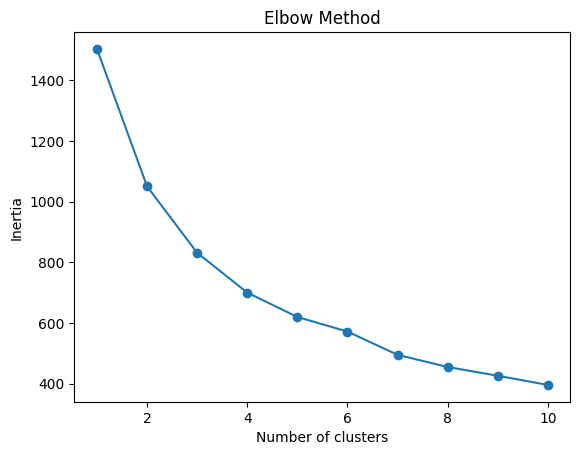

In [ ]:
# Plot the Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Based on the elbow curve, select the optimal number of clusters and retrain the model
optimal_clusters = 3  # Update this with the optimal number of clusters you find
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
# Assign cluster labels to each country
df['cluster'] = kmeans.labels_

In [ ]:
centroids = kmeans.cluster_centers_

<ipython-input-34-c173db063dba>:11: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(centroid[0], centroid[1], marker='x', s=200, color=colors[cluster], edgecolors='k', label=f'Centroid {cluster + 1}')


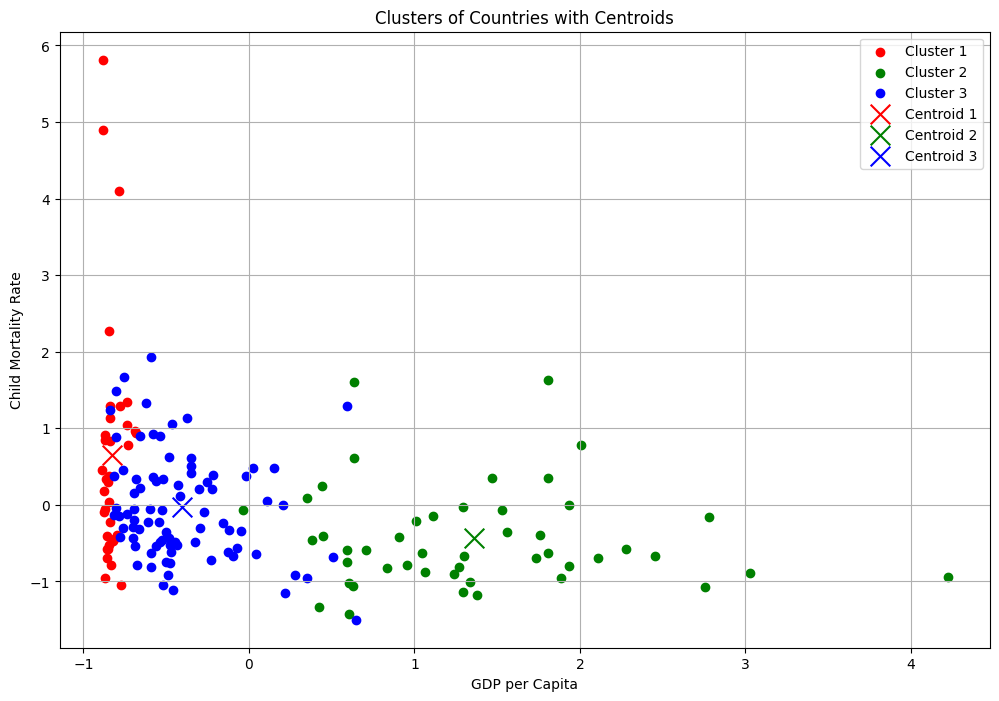

In [ ]:
# Plot clusters with centroids
plt.figure(figsize=(12, 8))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for cluster in range(optimal_clusters):
    plt.scatter(X_scaled[df['cluster'] == cluster][:, 0], X_scaled[df['cluster'] == cluster][:, 1],
                label=f'Cluster {cluster + 1}', color=colors[cluster])

# Plot centroids
for cluster in range(optimal_clusters):
    centroid = centroids[cluster]  # Assuming centroids is a list or array of centroids
    plt.scatter(centroid[0], centroid[1], marker='x', s=200, color=colors[cluster], edgecolors='k', label=f'Centroid {cluster + 1}')

plt.title('Clusters of Countries with Centroids')
plt.xlabel('GDP per Capita')
plt.ylabel('Child Mortality Rate')  # You can change these labels according to your dataset features
plt.legend()
plt.grid(True)
plt.show()